In [0]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [5]:
df = pd.DataFrame(np.random.randint(10, 100, size = (20000, 5)), 
                 columns = ["s1", "s2", "s3", "s4", "s5"])
df.head()

,s1,s2,s3,s4,s5
0,52,61,82,98,63
1,35,33,67,87,22
2,42,28,66,25,41
3,61,72,71,77,75
4,70,99,58,97,24


In [6]:
# 1st way
df['obtained'] = df.loc[:,'s1':'s5'].apply(lambda x:np.sum(x),axis=1)
df.head()

,s1,s2,s3,s4,s5,obtained
0,52,61,82,98,63,356
1,35,33,67,87,22,244
2,42,28,66,25,41,202
3,61,72,71,77,75,356
4,70,99,58,97,24,348


In [7]:
df['obtained'] = df.s1 + df.s2 + df.s3 + df.s4 + df.s5
df.head()

,s1,s2,s3,s4,s5,obtained
0,52,61,82,98,63,356
1,35,33,67,87,22,244
2,42,28,66,25,41,202
3,61,72,71,77,75,356
4,70,99,58,97,24,348


In [8]:
# Third way
df['obtained'] = df.loc[:,'s1':'s5'].apply(sum, axis = 1)
df.head()

,s1,s2,s3,s4,s5,obtained
0,52,61,82,98,63,356
1,35,33,67,87,22,244
2,42,28,66,25,41,202
3,61,72,71,77,75,356
4,70,99,58,97,24,348


In [9]:
def cal_sum(*x):
    return np.sum(x)
df['obtained'] = df.loc[:,'s1':'s5'].apply(lambda x:np.sum(x), axis = 1)
df.head()

,s1,s2,s3,s4,s5,obtained
0,52,61,82,98,63,356
1,35,33,67,87,22,244
2,42,28,66,25,41,202
3,61,72,71,77,75,356
4,70,99,58,97,24,348


In [10]:
df['Total'] = 500
df.head()

,s1,s2,s3,s4,s5,obtained,Total
0,52,61,82,98,63,356,500
1,35,33,67,87,22,244,500
2,42,28,66,25,41,202,500
3,61,72,71,77,75,356,500
4,70,99,58,97,24,348,500


In [12]:
df['percentage'] = df.obtained / df.Total * 100
df.head()

,s1,s2,s3,s4,s5,obtained,Total,percentage
0,52,61,82,98,63,356,500,71.2
1,35,33,67,87,22,244,500,48.8
2,42,28,66,25,41,202,500,40.4
3,61,72,71,77,75,356,500,71.2
4,70,99,58,97,24,348,500,69.6


# Calculate Grade with Rule base programming 
# Symbolic AI
# Traditional Programming

In [13]:
#Define Rule(Always defined by human(programmer))
def grade(x):
  if x>= 80:
    return "A+"
  elif x>= 70:
    return "A"
  elif x>= 60:
    return "B"
  elif x>= 50:
    return "C"
  elif x>= 40:
    return "D"
  elif x>= 33:
    return "E"
  else:
    return "Fail"
df['Grade'] = df.percentage.apply(grade)
df.head()

,s1,s2,s3,s4,s5,obtained,Total,percentage,Grade
0,52,61,82,98,63,356,500,71.2,A
1,35,33,67,87,22,244,500,48.8,D
2,42,28,66,25,41,202,500,40.4,D
3,61,72,71,77,75,356,500,71.2,A
4,70,99,58,97,24,348,500,69.6,B


In [14]:
df.Grade.value_counts()

C       6503
D       4849
B       4648
A       1585
E       1552
Fail     592
A+       271
Name: Grade, dtype: int64

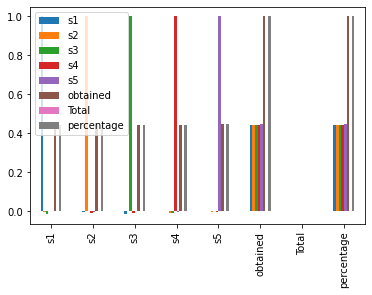

In [15]:
df.corr().plot(kind = 'bar')

In [16]:
df.Grade.unique()

array(['A', 'D', 'B', 'C', 'E', 'A+', 'Fail'], dtype=object)

In [18]:
dic = {v:k for k,v in enumerate(df.Grade.unique())}
  dic

IndentationError: ignored

In [20]:
dic ={
    "A+" : 7,
    "A" : 6,
    "C" : 4,
    "D" : 3,
    "E" : 2,
    "Fail" : 1
    }
dic


{'A': 6, 'A+': 7, 'C': 4, 'D': 3, 'E': 2, 'Fail': 1}

In [0]:
df["Grade1"] = df.Grade.map(dic)

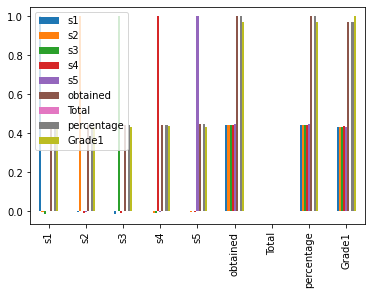

In [28]:
df.corr().plot(kind = 'bar')

In [33]:
df1 =df[["s1", "s2", "s3", "s4", "s5","Grade"]]
df1.head()

,s1,s2,s3,s4,s5,Grade
0,52,61,82,98,63,A
1,35,33,67,87,22,D
2,42,28,66,25,41,D
3,61,72,71,77,75,A
4,70,99,58,97,24,B


## Apply Deep Learning to get Rules or models or Software

In [34]:
df1.head(2)

,s1,s2,s3,s4,s5,Grade
0,52,61,82,98,63,A
1,35,33,67,87,22,D


**apply one hot- encoding on Grade column**
   A B C
A  1 0 0
B  0 1 0
C  0 0 1

In [35]:
pd.get_dummies(df1.Grade)

,A,A+,B,C,D,E,Fail
0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...
19995,0,0,0,0,0,1,0
19996,0,0,0,1,0,0,0
19997,0,0,0,0,1,0,0
19998,0,0,1,0,0,0,0


In [0]:
   A B C
A  1 0 0
B  0 1 0
C  0 0 1

In [36]:
X  = df1.loc[:,'s1':'s5']
X.head()

,s1,s2,s3,s4,s5
0,52,61,82,98,63
1,35,33,67,87,22
2,42,28,66,25,41
3,61,72,71,77,75
4,70,99,58,97,24


In [37]:
Y = df1.Grade
Y = pd.get_dummies(Y) #apply one hot- encoding on Grade column
Y.head()

,A,A+,B,C,D,E,Fail
0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

In [0]:
# first-layer input_shape (no of columns in X)
#Last layer output no of labels in Y( unique values )
#last-layer activation  function depends on your problem(4.6)
model = Sequential()
model.add(Dense(5, input_shape=(5,), activation='relu'))
model.add(Dense(7, activation = 'softmax')) # last-layer output depends on numbers of labels

In [47]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_6 (Dense)              (None, 7)                 42        
Total params: 72
Trainable params: 72
Non-trainable params: 0
_________________________________________________________________


In [0]:
# optimizer Updates => weights (w,b) based on loss ffunction
model.compile(optimizer=Adam(lr = .2),
              loss="categorical_crossentropy",
              metrics = ['acc']
              )

In [51]:
model.fit(X,Y, epochs=30)

Epoch 1/30
625/625 [==============================] - 1s 2ms/step - loss: 1.6281 - acc: 0.3032
Epoch 2/30
625/625 [==============================] - 1s 2ms/step - loss: 1.6268 - acc: 0.3065
Epoch 3/30
625/625 [==============================] - 1s 2ms/step - loss: 1.6261 - acc: 0.3090
Epoch 4/30
625/625 [==============================] - 1s 2ms/step - loss: 1.6286 - acc: 0.3081
Epoch 5/30
625/625 [==============================] - 1s 2ms/step - loss: 1.6309 - acc: 0.3043
Epoch 6/30
625/625 [==============================] - 1s 2ms/step - loss: 1.6258 - acc: 0.3087
Epoch 7/30
625/625 [==============================] - 1s 2ms/step - loss: 1.6282 - acc: 0.3030
Epoch 8/30
625/625 [==============================] - 1s 2ms/step - loss: 1.6294 - acc: 0.3041
Epoch 9/30
625/625 [==============================] - 1s 2ms/step - loss: 1.6277 - acc: 0.3101
Epoch 10/30
625/625 [==============================] - 1s 2ms/step - loss: 1.6272 - acc: 0.3099
Epoch 11/30
625/625 [============================

In [53]:
df['Predict'] = Y.columns.take(np.argmax(
    model.predict(df1.loc[:,'s1':'s5']),
    axis=1
))
df.head()

,s1,s2,s3,s4,s5,obtained,Total,percentage,Grade,Grade1,Predict
0,52,61,82,98,63,356,500,71.2,A,6.0,C
1,35,33,67,87,22,244,500,48.8,D,3.0,C
2,42,28,66,25,41,202,500,40.4,D,3.0,C
3,61,72,71,77,75,356,500,71.2,A,6.0,C
4,70,99,58,97,24,348,500,69.6,B,NaN,C


In [54]:
df.Grade.value_counts()

C       6503
D       4849
B       4648
A       1585
E       1552
Fail     592
A+       271
Name: Grade, dtype: int64

In [0]:
df1